import os
import shutil
from sklearn.model_selection import train_test_split

In [105]:
import numpy as np
import cv2
import os
import torch
from sklearn.model_selection import train_test_split
import pandas as pd
from PIL import Image
import cv2



In [106]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm.auto import tqdm
import os

In [ ]:
#Grabs images from Roboflow 

#from roboflow import Roboflow
#rf = Roboflow(api_key="sYsvlRuqf2HHQYxWNXu5")
#project = rf.workspace("alzheimer-h49wu").project("alzheimer-detection-ra7oh")
##version = project.version(1)
dataset = version.download("folder")
                

In [107]:
# Check for GPU
#device = "cuda" if torch.cuda.is_available() else "cpu"

# Check for GPU in mac
device = "mps" if torch.backends.mps.is_available() else "cpu"

device

'mps'

In [16]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the base directory (adjust this to your Rivanna directory path)
base_dir = '/home/rkk6nx/Project3/DS4002_Group2_Project3/SCRIPTS/alzheimer-detection-1'  # Update this path to where your data is located

# Define the directories
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# The categories in your dataset
labels = ['Mild Impairment', 'No Impairment', 'Moderate Impairment', 'Very Mild Impairment']

# Create a new directory to combine train and test data
combined_dir = os.path.join(base_dir, 'combined')
os.makedirs(combined_dir, exist_ok=True)

# Combine images from train and test for each impairment type
for label in labels:
    # Paths for each category (train and test)
    label_train_dir = os.path.join(train_dir, label)
    label_test_dir = os.path.join(test_dir, label)

    # Create the combined directory for this label
    label_combined_dir = os.path.join(combined_dir, label)
    os.makedirs(label_combined_dir, exist_ok=True)

    # Get a list of all images in both the train and test directories
    train_images = [os.path.join(label_train_dir, f) for f in os.listdir(label_train_dir) if f.endswith('.jpg')]
    test_images = [os.path.join(label_test_dir, f) for f in os.listdir(label_test_dir) if f.endswith('.jpg')]

    # Combine images
    all_images = train_images + test_images

    # Copy all images to the combined directory for this label
    for img in all_images:
        shutil.copy(img, label_combined_dir)

print("Images have been successfully combined into the 'combined' folder!")

# Now resplit the combined data into a new train/test split
new_train_dir = os.path.join(base_dir, 'new_train')
new_test_dir = os.path.join(base_dir, 'new_test')
os.makedirs(new_train_dir, exist_ok=True)
os.makedirs(new_test_dir, exist_ok=True)

# Split images into new train/test set for each label
for label in labels:
    label_combined_dir = os.path.join(combined_dir, label)

    # Get all image paths for the label
    all_images = [os.path.join(label_combined_dir, f) for f in os.listdir(label_combined_dir) if f.endswith('.jpg')]

    # Split into train/test (80% train, 20% test) using sklearn's train_test_split
    train_images, test_images = train_test_split(all_images, test_size=0.2, random_state=42)

    # Create directories for the new train and test splits
    label_new_train_dir = os.path.join(new_train_dir, label)
    label_new_test_dir = os.path.join(new_test_dir, label)
    os.makedirs(label_new_train_dir, exist_ok=True)
    os.makedirs(label_new_test_dir, exist_ok=True)

    # Move images to new train and test directories
    for img in train_images:
        shutil.copy(img, label_new_train_dir)
    
    for img in test_images:
        shutil.copy(img, label_new_test_dir)

print("Images have been successfully resplit into new train/test sets!")


In [ ]:
from torchvision import transforms

data_transforms = {

    'new_train' : transforms.Compose([
        transforms.RandomResizedCrop((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]),
    'new_test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()

    ])
}


In [76]:
print(f"Dataset sizes: {dataset_sizes}")
print(f"Class names: {class_names}")


Dataset sizes: {'Training': 3530, 'Testing': 9390}
Class names: ['Mild Impairment', 'Moderate Impairment', 'No Impairment', 'Very Mild Impairment']


/var/folders/q2/p4k6j1ss1qd27364rjxv2fxh0000gn/T/ipykernel_3738/2123115336.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 8, i+1)


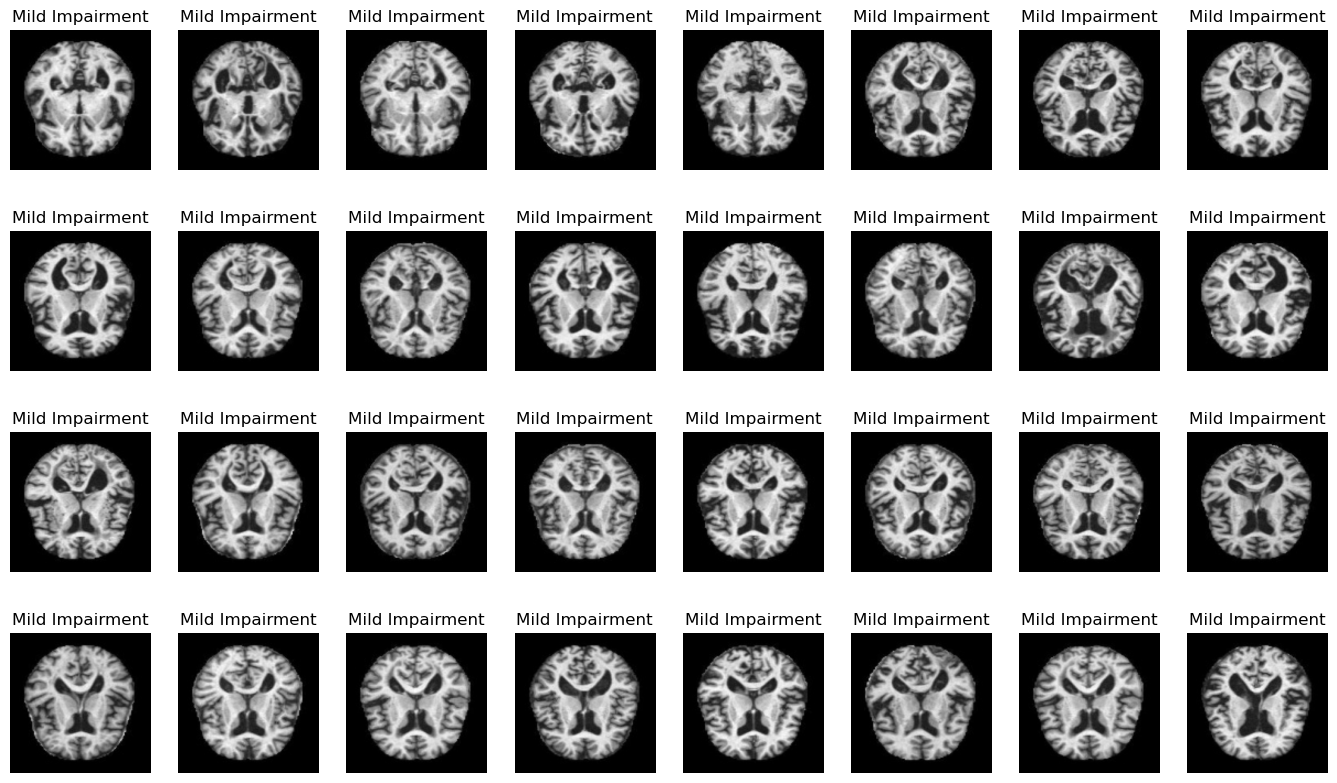

In [102]:
samples, labels = next(iter(dataloaders['Testing']))
plt.figure(figsize=(17, 10))
plt.axis('off')
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(samples[i].permute(1, 2, 0))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1953 entries, 8641 to 2865
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Impairment_Type  1953 non-null   object
 1   Image_Name       1953 non-null   object
 2   Image_Path       1953 non-null   object
 3   Image_Data       1953 non-null   object
dtypes: object(4)
memory usage: 76.3+ KB


In [104]:
from torchvision import models
from torchvision.models import ResNet50_Weights

# Load the model with pre-trained weights
model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

# Freeze all the layers
for param in model.parameters():
        param.requires_grad = False
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
model = models.resnet50(weights=ResNet50_Weights.DEFAULT)

model.fc = nn.Linear(model.fc.in_features, 4)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=1e-4)  


In [ ]:
# Move the model to the appropriate device
model.to(device)

In [ ]:
# Number of epochs to train
num_epochs = 30

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in dataloaders['new_train']:
        # Move inputs and labels to GPU
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Print loss and accuracy after every epoch
    epoch_loss = running_loss / len(dataloaders['new_train'])
    epoch_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions from the model
model.eval()  # Set to evaluation mode
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in dataloaders['new_train']:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model.eval()  

In [ ]:
import torch

# Variables to track predictions and true labels
correct = 0
total = 0

# Disable gradient calculations during inference for faster computation
with torch.no_grad():
    for inputs, labels in dataloaders['new_test']:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to device (GPU/CPU)
        
        # Forward pass: Get model outputs (predictions)
        outputs = model(inputs)
        
        # Get the predicted class (the class with the highest probability)
        _, predicted = torch.max(outputs, 1)
        
        # Update total and correct predictions count
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


In [86]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize lists to store true labels and predicted labels
all_true_labels = []
all_predicted_labels = []

with torch.no_grad():
    for inputs, labels in dataloaders['new_test']:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        all_true_labels.extend(labels.cpu().numpy())
        all_predicted_labels.extend(predicted.cpu().numpy())

# Compute precision, recall, and F1-score
precision = precision_score(all_true_labels, all_predicted_labels, average='weighted')
recall = recall_score(all_true_labels, all_predicted_labels, average='weighted')
f1 = f1_score(all_true_labels, all_predicted_labels, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)

print(report)